In [484]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
import urllib.request
#stopwordlist = urllib.request.urlopen('http://www.textfixer.com/resources/common-english-words.txt').read()
#for line in stopwordlist:
#    stopword = line.split(",")

In [485]:
text1 = open("state_of_union.txt")
text = text1.read()
text_list=text.split("***")
text1.close()

In [486]:
title = text_list[0].split("\n ")[1:]
#title = text_list[0]
#print (title)

In [487]:
for i in range(len(title)):
    title[i] = title[i].replace("\r\n","")

In [488]:
content=[]
for article in text_list[1:]:
    temp_content = article.replace("\r\n\r\n"," ")
    temp_content = temp_content.replace("\r\n"," ")
    temp_content = re.split(r'\d{4}',temp_content,1)[1]
    content.append(temp_content)

In [489]:
len(title)

224

In [490]:
title[0]

' George Washington, State of the Union Address, January 8, 1790'

In [491]:
#split up title into president, month, day and year
title1 = []
for i in range(len(title)):
    temp_title = title[i].split(",")
    temp_title = [temp_title[0], temp_title[2], temp_title[3]]
    title1.append(temp_title)

[[' William J. Clinton', ' January 25', ' 1994'], [' William J. Clinton', ' January 24', ' 1995'], [' William J. Clinton', ' January 23', ' 1996'], [' William J. Clinton', ' February 4', ' 1997'], [' William J. Clinton', ' January 27', ' 1998'], [' William J. Clinton', ' January 19', ' 1999'], [' William J. Clinton', ' January 27', ' 2000'], [' George W. Bush', ' February 27', ' 2001'], [' George W. Bush', ' September 20', ' 2001'], [' George W. Bush', ' January 29', ' 2002'], [' George W. Bush', ' January 28', ' 2003'], [' George W. Bush', ' January 20', ' 2004'], [' George W. Bush', ' February 2', ' 2005'], [' George W. Bush', ' January 31', ' 2006\n'], [' George W. Bush', ' January 23', ' 2007'], [' George W. Bush', ' January 28', ' 2008\n\n'], [' Barack Obama', ' February 24', ' 2009'], [' Barack Obama', ' January 27', ' 2010'], [' Barack Obama', ' January 25', ' 2011'], [' Barack Obama', ' January 24', ' 2012'], [' Barack Obama', ' February 12', ' 2013'], [' Barack Obama', ' Janua

In [492]:
len(content)

224

In [493]:
#Count of words trend:
length=[]
for article in content:
    article = re.sub(r'[^\w]', ' ', article)
    article = article.split()
    length.append(len(article))

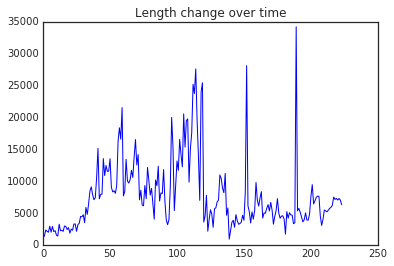

In [494]:
import numpy as np

x = range(len(length))
y = np.array(length)
plt.title("Length change over time")
plt.plot(x,y);

In [495]:
#graph dates of speeches

date_count = {}
for i in title1:
    date = i[1].strip()
    if date_count:
        if date in date_count:   
            date_count[date] = date_count[date] + 1
        else:
            date_count[date] = 1
    else:
        date_count[date] = 1

# wildcard imports are an anti-pattern
# http://docs.quantifiedcode.com/python-code-patterns/maintainability/from_module_import_all_used.html
#from matplotlib import *

#plt.figure(figsize=(17,17))

#plt.bar(range(len(date_count)), date_count.values(), align='center')
#plt.xticks(range(len(date_count)), date_count.keys(), rotation = 'vertical')

#plt.show()


In [496]:
dates = pd.DataFrame({"Date": list(date_count.keys()), "Count": list(date_count.values())})

In [497]:
# Add a year to dates in Jan/Feb and reformat date to allow converstion to datetime
def hack_time(x):
    time_pieces = x.split(" ")
    month = time_pieces[0]
    day = time_pieces[1]
    if month in ["January", "February"]:
        return "%s/%s/%d" % (day, month[:3], 2016)
    else:
        return "%s/%s/%d" % (day, month[:3], 2015)

In [498]:
dates['time_hack'] = pd.to_datetime(dates.Date.apply(lambda x: hack_time(x)))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

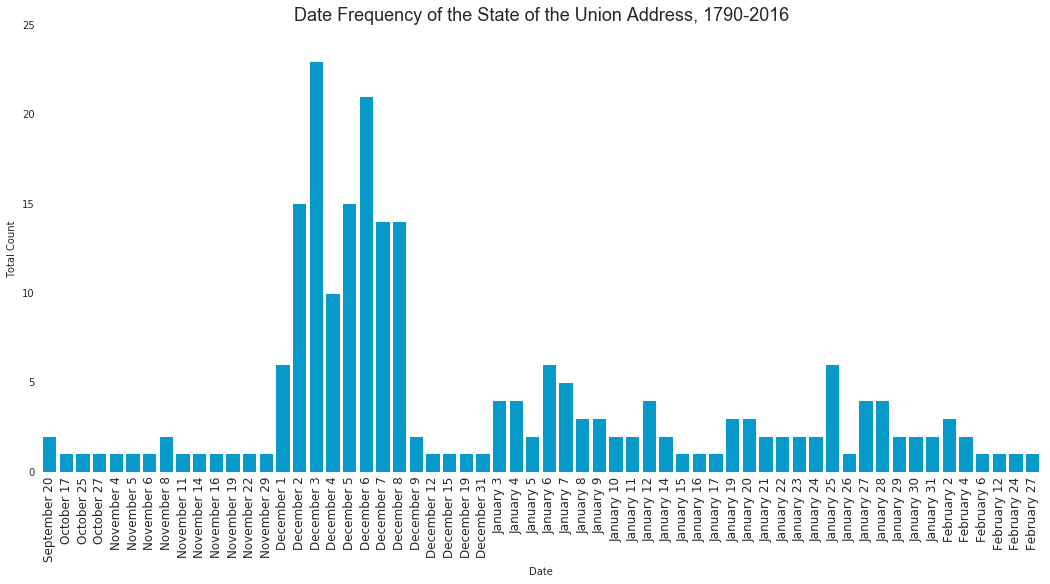

In [499]:
cool_blue = '#0699C9'
hot_red = '#DE182F'

plt.style.use('seaborn-white')

#sort by date and plot
ax = dates.sort_values(by="time_hack").plot(kind='bar', width=.8, x="Date", color=cool_blue,
                rot=90, legend=False, figsize=(18, 8), edgecolor="none")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Date Frequency of the State of the Union Address, 1790-2016", fontsize="18")
plt.ylabel("Total Count")
plt.xticks(fontsize="12")

### 

In [500]:
#something with countries mentioned
countries1 = open("countries.txt", "r")
countries = countries1.read()
countries1.close()
countries = countries.split("\n")
country_names = []
for line in countries:
    temp_line = line.split("|")
    country_names.append(temp_line[1])


country_mention_count = {}    
for country in country_names:
    for speech in content:
        if country in speech:
            if country in country_mention_count:
                country_mention_count[country] = country_mention_count[country] + 1
            else:
                country_mention_count[country] = 1
            
    
    
#plt.figure(figsize=(30,25))

#plt.bar(range(len(country_mention_count)), country_mention_count.values(), align='center')
#plt.xticks(range(len(country_mention_count)), country_mention_count.keys(), rotation = 'vertical')

#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

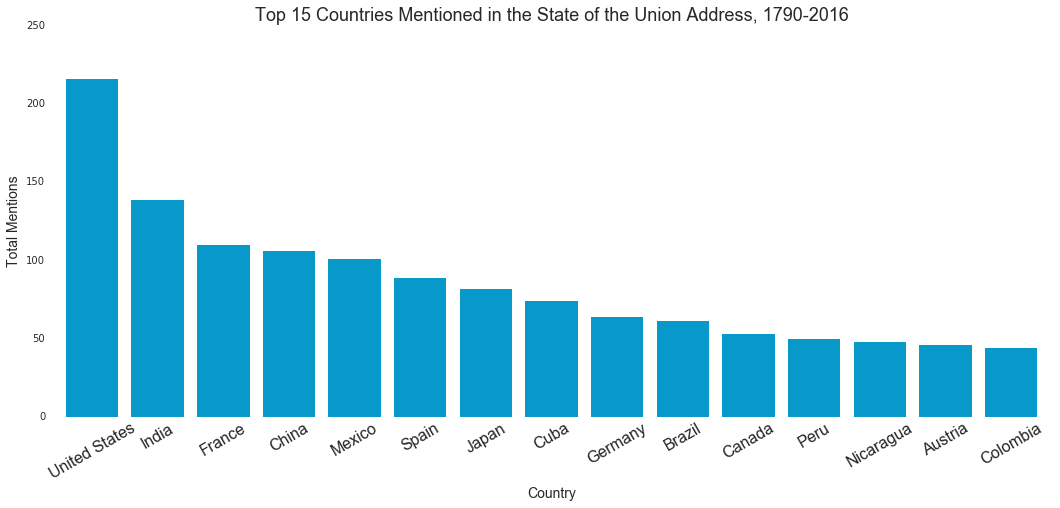

In [501]:
# Sort by number of mentions, reduce number of countries to make it easier to read
limit = 15
mentions = pd.DataFrame({"Country": list(country_mention_count.keys()), "Count": list(country_mention_count.values())})
ax = mentions.sort_values(by="Count", ascending=False)[:limit].plot(kind="bar", width=.8,
                                                         x="Country",
                                                         color=cool_blue,
                                                         rot=30, legend=False, figsize=(18, 7), edgecolor = "none")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Top %s Countries Mentioned in the State of the Union Address, 1790-2016" % limit, fontsize=18)
plt.ylabel("Total Mentions", fontsize=14)
plt.xlabel("Country", fontsize=14)
plt.xticks(fontsize = 16)

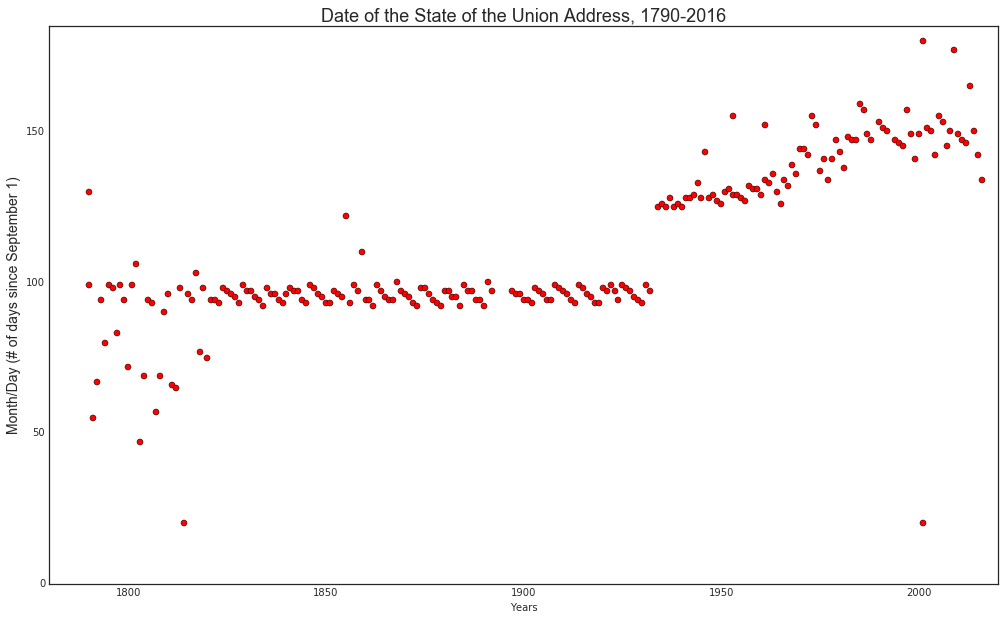

In [502]:
months = []
days = []
years_temp = []
test2 = []
for i in title1:
    year = i[2]
    temp_date = i[1]
    test2.append(temp_date)
    temp_date = temp_date.strip().split(" ")
    months.append(temp_date[0])
    days.append(temp_date[1])
    years_temp.append(year)

years = []
for year in years_temp:
    year = year.split("\n")
    years.append(year[0])


def translate(day, month, year):
    year = int(year)
    if month == "September" or month == "November":
        daysInMonth = 30
    elif month == "October" or month == "December" or month == "January":
        daysInMonth = 31
    elif month == "February":
        if year % 4 == 0:
            daysInMonth = 29
        else:
            daysInMonth = 28
    span = 9.99
    # Convert the left range into a 0-1 range (float)
    valueScaled = float(day) / float(daysInMonth)
    # Convert the 0-1 range into the scaled value.
    return (valueScaled * span)

#scaled_date_final = []
#for i in range(len(months)):
#    day_value = days[i]
#    month_value = months[i]
#    year_value = years[i]
#    scaled_day = translate(day_value, month_value, year_value)
#    if month_value == "September":
#        scaled_date_final.append(scaled_day)
#    if month_value == "October":
#        scaled_date_final.append(10 + scaled_day)
#    if month_value == 'November':
#        scaled_date_final.append(20 + scaled_day)
#    if month_value == "December":
#        scaled_date_final.append(30 + scaled_day)
#    if month_value == "January":
#        scaled_date_final.append(40 + scaled_day)
#    if month_value == "February":
#        scaled_date_final.append(50 + scaled_day)
        
        
scaled_date_final = []
for i in range(len(months)):
    day_value = int(days[i])
    month_value = months[i]
    if month_value == "September":
        scaled_date_final.append(day_value)
    if month_value == "October":
        scaled_date_final.append(30 + day_value)
    if month_value == 'November':
        scaled_date_final.append(61 + day_value)
    if month_value == "December":
        scaled_date_final.append(91 + day_value)
    if month_value == "January":
        scaled_date_final.append(122 + day_value)
    if month_value == "February":
        scaled_date_final.append(153 + day_value)
        

plt.figure(figsize=(17,10))    
plt.plot(years, scaled_date_final, 'ro')
axes = plt.gca()
axes.set_ylim([0,185])
axes.set_xlim([1780,2020])

plt.title("Date of the State of the Union Address, 1790-2016", fontsize="18")
plt.ylabel("Month/Day (# of days since September 1)", fontsize=14)
plt.xlabel("Years")
plt.show()



#dates = pd.DataFrame({"Date": test2})
#time_hack_dates = []
#for date in test2:
#    time_pieces = date.strip().split(" ")
#    month = time_pieces[0]
#    day = time_pieces[1]
#    if month in ["January", "February"]:
#        time_hack_dates.append(day + "/"  + month[:3] +  "/" + '2016')
#    else:
#        time_hack_dates.append(day + "/" + month[:3] + "/" + '2015')
#dates['time_hack'] = pd.to_datetime(time_hack_dates)
#dates['years'] = years
#dates['years']=dates['years'].astype(float)
#print(dates)
#ax = dates.plot.scatter(x='years', y = 'time_hack')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

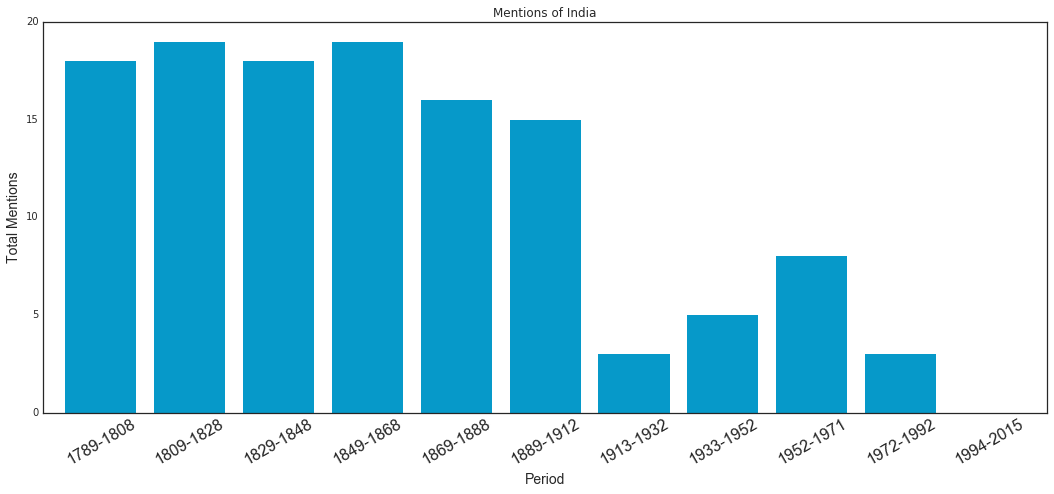

In [503]:
#exploring most mentioned countries: India
india_count = {}
india_count['1789-1808'] = 0
for i in range(0,20):
    if "India" in content[i]:
        india_count['1789-1808'] = india_count['1789-1808'] + 1

india_count['1809-1828'] = 0
for i in range(21,40):
    if "India" in content[i]:
        india_count['1809-1828'] = india_count['1809-1828'] + 1
        
india_count['1829-1848'] = 0
for i in range(41,60):
    if "India" in content[i]:
        india_count['1829-1848'] = india_count['1829-1848'] + 1
        
india_count['1849-1868'] = 0
for i in range(61,80):
    if "India" in content[i]:
        india_count['1849-1868'] = india_count['1849-1868'] + 1
        
india_count['1869-1888'] = 0
for i in range(81,100):
    if "India" in content[i]:
        india_count['1869-1888'] = india_count['1869-1888'] + 1
        
india_count['1889-1912'] = 0
for i in range(101,120):
    if "India" in content[i]:
        india_count['1889-1912'] = india_count['1889-1912'] + 1
        
india_count['1913-1932'] = 0
for i in range(121,140):
    if "India" in content[i]:
        india_count['1913-1932'] = india_count['1913-1932'] + 1
        
india_count['1933-1952'] = 0
for i in range(141,160):
    if "India" in content[i]:
        india_count['1933-1952'] = india_count['1933-1952'] + 1
        

india_count['1952-1971'] = 0
for i in range(161,180):
    if "India" in content[i]:
        india_count['1952-1971'] = india_count['1952-1971'] + 1

india_count['1972-1992'] = 0
for i in range(181,200):
    if "India" in content[i]:
        india_count['1972-1992'] = india_count['1972-1992'] + 1
        

india_count['1994-2015'] = 0
for i in range(291,225):
    if "India" in content[i]:
        india_count['1994-2015'] = india_count['1994-2015'] + 1
        
        
india_mentions = pd.DataFrame({"Period": list(india_count.keys()), "Count": list(india_count.values())})
ax = india_mentions.sort_values(by="Period").plot(kind="bar", width=.8,
                                                         x="Period",
                                                         color=cool_blue,
                                                         rot=30, legend=False, figsize=(18, 7), edgecolor = "none")

plt.title("Mentions of India")
plt.ylabel("Total Mentions", fontsize=14)
plt.xlabel("Period", fontsize=14)
plt.xticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

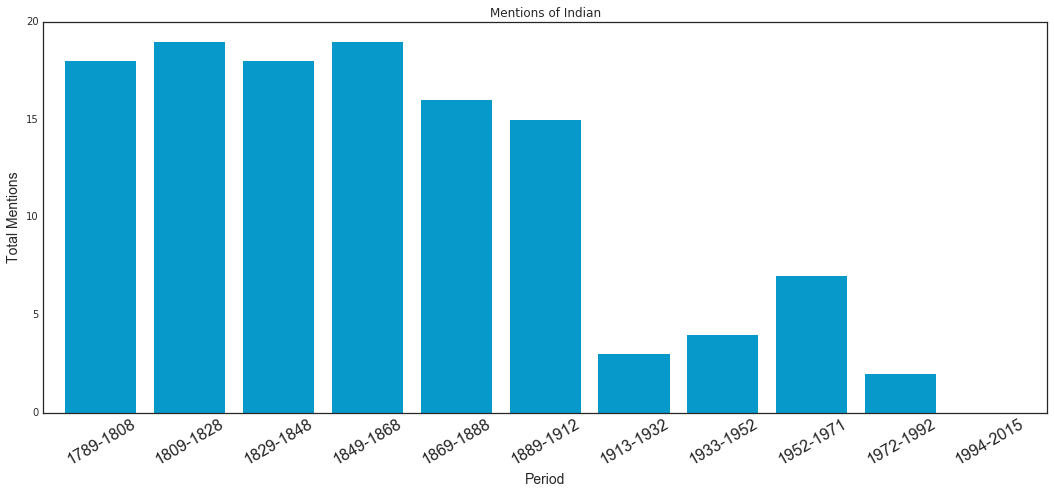

In [504]:
#exploring most mentioned countries: India
india_count = {}
india_count['1789-1808'] = 0
for i in range(0,20):
    if "Indian" in content[i]:
        india_count['1789-1808'] = india_count['1789-1808'] + 1

india_count['1809-1828'] = 0
for i in range(21,40):
    if "Indian" in content[i]:
        india_count['1809-1828'] = india_count['1809-1828'] + 1
        
india_count['1829-1848'] = 0
for i in range(41,60):
    if "Indian" in content[i]:
        india_count['1829-1848'] = india_count['1829-1848'] + 1
        
india_count['1849-1868'] = 0
for i in range(61,80):
    if "Indian" in content[i]:
        india_count['1849-1868'] = india_count['1849-1868'] + 1
        
india_count['1869-1888'] = 0
for i in range(81,100):
    if "Indian" in content[i]:
        india_count['1869-1888'] = india_count['1869-1888'] + 1
        
india_count['1889-1912'] = 0
for i in range(101,120):
    if "Indian" in content[i]:
        india_count['1889-1912'] = india_count['1889-1912'] + 1
        
india_count['1913-1932'] = 0
for i in range(121,140):
    if "Indian" in content[i]:
        india_count['1913-1932'] = india_count['1913-1932'] + 1
        
india_count['1933-1952'] = 0
for i in range(141,160):
    if "Indian" in content[i]:
        india_count['1933-1952'] = india_count['1933-1952'] + 1
        

india_count['1952-1971'] = 0
for i in range(161,180):
    if "Indian" in content[i]:
        india_count['1952-1971'] = india_count['1952-1971'] + 1

india_count['1972-1992'] = 0
for i in range(181,200):
    if "Indian" in content[i]:
        india_count['1972-1992'] = india_count['1972-1992'] + 1
        

india_count['1994-2015'] = 0
for i in range(291,225):
    if "Indian" in content[i]:
        india_count['1994-2015'] = india_count['1994-2015'] + 1
        
        
india_mentions = pd.DataFrame({"Period": list(india_count.keys()), "Count": list(india_count.values())})
ax = india_mentions.sort_values(by="Period").plot(kind="bar", width=.8,
                                                         x="Period",
                                                         color=cool_blue,
                                                         rot=30, legend=False, figsize=(18, 7), edgecolor = "none")

plt.title("Mentions of Indian")
plt.ylabel("Total Mentions", fontsize=14)
plt.xlabel("Period", fontsize=14)
plt.xticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

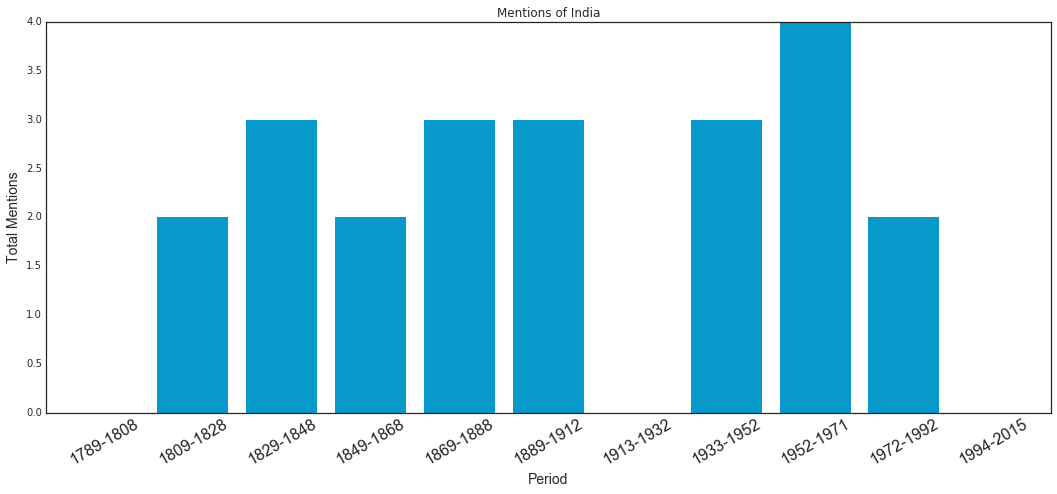

In [505]:
#exploring most mentioned countries: India
india_count = {}
india_count['1789-1808'] = 0
for i in range(0,20):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1789-1808'] = india_count['1789-1808'] + 1

india_count['1809-1828'] = 0
for i in range(21,40):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1809-1828'] = india_count['1809-1828'] + 1
        
india_count['1829-1848'] = 0
for i in range(41,60):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1829-1848'] = india_count['1829-1848'] + 1
        
india_count['1849-1868'] = 0
for i in range(61,80):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1849-1868'] = india_count['1849-1868'] + 1
        
india_count['1869-1888'] = 0
for i in range(81,100):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1869-1888'] = india_count['1869-1888'] + 1
        
india_count['1889-1912'] = 0
for i in range(101,120):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1889-1912'] = india_count['1889-1912'] + 1
        
india_count['1913-1932'] = 0
for i in range(121,140):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1913-1932'] = india_count['1913-1932'] + 1
        
india_count['1933-1952'] = 0
for i in range(141,160):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1933-1952'] = india_count['1933-1952'] + 1
        

india_count['1952-1971'] = 0
for i in range(161,180):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1952-1971'] = india_count['1952-1971'] + 1

india_count['1972-1992'] = 0
for i in range(181,200):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1972-1992'] = india_count['1972-1992'] + 1
        

india_count['1994-2015'] = 0
for i in range(291,225):
    if "India " in content[i] or "India," in content[i] or "India." in content[i] or "India;" in content[i]:
        india_count['1994-2015'] = india_count['1994-2015'] + 1
        
        
india_mentions = pd.DataFrame({"Period": list(india_count.keys()), "Count": list(india_count.values())})
ax = india_mentions.sort_values(by="Period").plot(kind="bar", width=.8,
                                                         x="Period",
                                                         color=cool_blue,
                                                         rot=30, legend=False, figsize=(18, 7), edgecolor = "none")

plt.title("Mentions of India")
plt.ylabel("Total Mentions", fontsize=14)
plt.xlabel("Period", fontsize=14)
plt.xticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

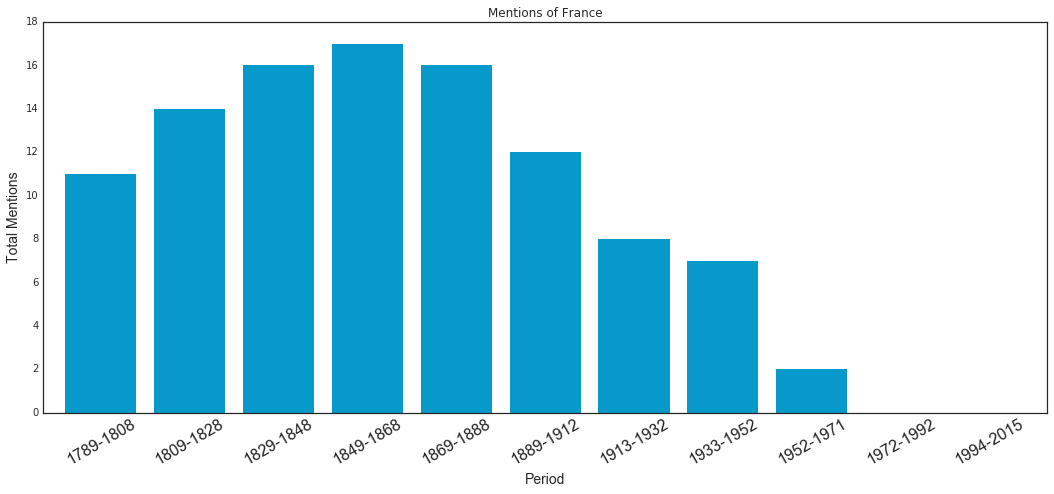

In [506]:
#exploring most mentioned countries: france
france_count = {}
france_count['1789-1808'] = 0
for i in range(0,20):
    if "France" in content[i]:
        france_count['1789-1808'] = france_count['1789-1808'] + 1

france_count['1809-1828'] = 0
for i in range(21,40):
    if "France" in content[i]:
        france_count['1809-1828'] = france_count['1809-1828'] + 1
        
france_count['1829-1848'] = 0
for i in range(41,60):
    if "France" in content[i]:
        france_count['1829-1848'] = france_count['1829-1848'] + 1
        
france_count['1849-1868'] = 0
for i in range(61,80):
    if "France" in content[i]:
        france_count['1849-1868'] = france_count['1849-1868'] + 1
        
france_count['1869-1888'] = 0
for i in range(81,100):
    if "France" in content[i]:
        france_count['1869-1888'] = france_count['1869-1888'] + 1
        
france_count['1889-1912'] = 0
for i in range(101,120):
    if "France" in content[i]:
        france_count['1889-1912'] = france_count['1889-1912'] + 1
        
france_count['1913-1932'] = 0
for i in range(121,140):
    if "France" in content[i]:
        france_count['1913-1932'] = france_count['1913-1932'] + 1
        
france_count['1933-1952'] = 0
for i in range(141,160):
    if "France" in content[i]:
        france_count['1933-1952'] = france_count['1933-1952'] + 1
        

france_count['1952-1971'] = 0
for i in range(161,180):
    if "France" in content[i]:
        france_count['1952-1971'] = france_count['1952-1971'] + 1

france_count['1972-1992'] = 0
for i in range(181,200):
    if "France" in content[i]:
        france_count['1972-1992'] = france_count['1972-1992'] + 1
        

france_count['1994-2015'] = 0
for i in range(291,225):
    if "France" in content[i]:
        france_count['1994-2015'] = france_count['1994-2015'] + 1
        
        
france_mentions = pd.DataFrame({"Period": list(france_count.keys()), "Count": list(france_count.values())})
ax = france_mentions.sort_values(by="Period").plot(kind="bar", width=.8,
                                                         x="Period",
                                                         color=cool_blue,
                                                         rot=30, legend=False, figsize=(18, 7), edgecolor = "none")

plt.title("Mentions of France")
plt.ylabel("Total Mentions", fontsize=14)
plt.xlabel("Period", fontsize=14)
plt.xticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

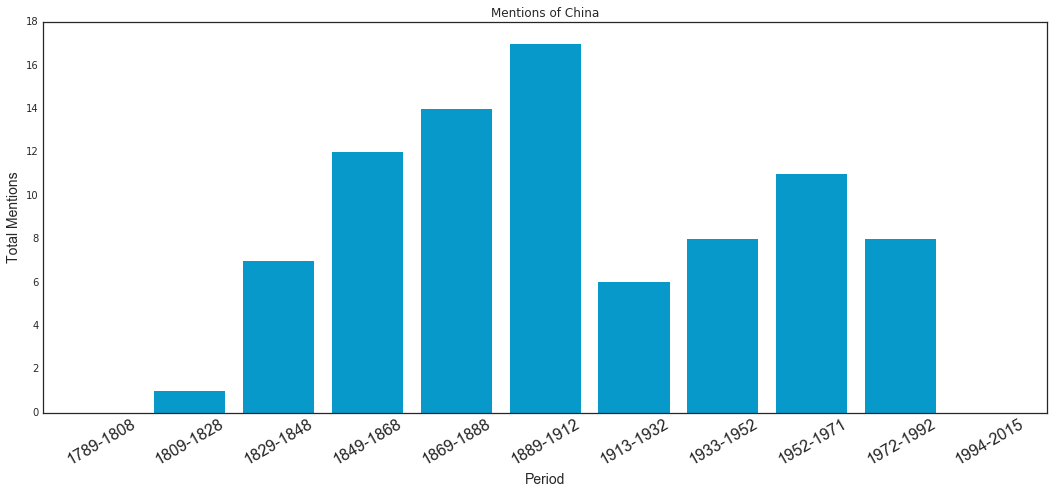

In [507]:
#exploring most mentioned countries: China
china_count = {}
china_count['1789-1808'] = 0
for i in range(0,20):
    if "China" in content[i]:
        china_count['1789-1808'] = china_count['1789-1808'] + 1

china_count['1809-1828'] = 0
for i in range(21,40):
    if "China" in content[i]:
        china_count['1809-1828'] = china_count['1809-1828'] + 1
        
china_count['1829-1848'] = 0
for i in range(41,60):
    if "China" in content[i]:
        china_count['1829-1848'] = china_count['1829-1848'] + 1
        
china_count['1849-1868'] = 0
for i in range(61,80):
    if "China" in content[i]:
        china_count['1849-1868'] = china_count['1849-1868'] + 1
        
china_count['1869-1888'] = 0
for i in range(81,100):
    if "China" in content[i]:
        china_count['1869-1888'] = china_count['1869-1888'] + 1
        
china_count['1889-1912'] = 0
for i in range(101,120):
    if "China" in content[i]:
        china_count['1889-1912'] = china_count['1889-1912'] + 1
        
china_count['1913-1932'] = 0
for i in range(121,140):
    if "China" in content[i]:
        china_count['1913-1932'] = china_count['1913-1932'] + 1
        
china_count['1933-1952'] = 0
for i in range(141,160):
    if "China" in content[i]:
        china_count['1933-1952'] = china_count['1933-1952'] + 1
        

china_count['1952-1971'] = 0
for i in range(161,180):
    if "China" in content[i]:
        china_count['1952-1971'] = china_count['1952-1971'] + 1

china_count['1972-1992'] = 0
for i in range(181,200):
    if "China" in content[i]:
        china_count['1972-1992'] = china_count['1972-1992'] + 1
        

china_count['1994-2015'] = 0
for i in range(291,225):
    if "China" in content[i]:
        china_count['1994-2015'] = china_count['1994-2015'] + 1
        
        
china_mentions = pd.DataFrame({"Period": list(china_count.keys()), "Count": list(china_count.values())})
ax = china_mentions.sort_values(by="Period").plot(kind="bar", width=.8,
                                                         x="Period",
                                                         color=cool_blue,
                                                         rot=30, legend=False, figsize=(18, 7), edgecolor = "none")

plt.title("Mentions of China")
plt.ylabel("Total Mentions", fontsize=14)
plt.xlabel("Period", fontsize=14)
plt.xticks(fontsize = 16)